In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Support Vector Machines
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.<br>

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.<br>

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:<br>
<img src="Images/svm.png">

### Hyperplane: 
There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out the best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.
<br>
The dimensions of the hyperplane depend on the features present in the dataset, which means if there are 2 features (as shown in image), then hyperplane will be a straight line. And if there are 3 features, then hyperplane will be a 2-dimension plane.
<br>
We always create a hyperplane that has a maximum margin, which means the maximum distance between the data points.

### Support Vectors:
The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector.

### Margin
The SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane. SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the <b>optimal hyperplane</b>.

# How does SVM works?

### 1) Linear SVM:

The working of the SVM algorithm can be understood by using an example. Suppose we have a dataset that has two tags (green and blue), and the dataset has two features x1 and x2. We want a classifier that can classify the pair(x1, x2) of coordinates in either green or blue. Consider the below image:
<img src="Images/svm2.png">

So as it is 2-d space so by just using a straight line, we can easily separate these two classes. But there can be multiple lines that can separate these classes. Consider the below image:
<img src="Images/svm3.png">

If data is linearly arranged, then we can separate it by using a straight line, but for non-linear data, we cannot draw a single straight line. Consider the below image:
<img src="Images/svm4.png">

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

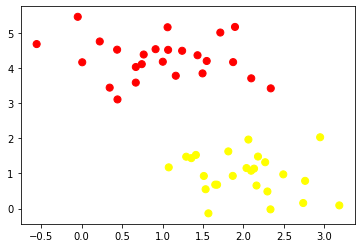

In [6]:
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

In [3]:
from sklearn.svm import SVC 

In [4]:
model = SVC(kernel='linear')

In [8]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
pred = model.predict(x_test)

To  better  visualize  what’s  happening  here,  let’s  create  a  quick  convenience  functionthat will plot SVM decision boundaries for us

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
             
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
        
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
        
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], 
               alpha=0.5,linestyles=['--', '-', '--'])

### Plotting our x_train  data on the basis of y_train

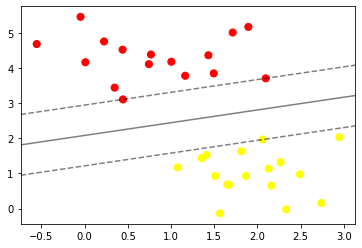

In [18]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(model)

### plotting our x_test and their results in the form of colors 

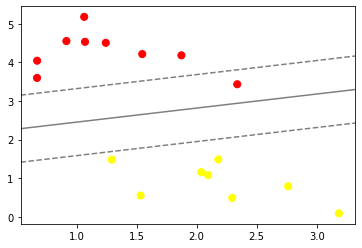

In [17]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=50, cmap='autumn')
plot_svc_decision_function(model)

### 2) Non-Linear SVM
So to separate these data points, we need to add one more dimension. For linear data, we have used two dimensions x and y, so for non-linear data, we will add a third dimension z. It can be calculated as:<br>
<b>z<sup>2</sup>=x<sup>2</sup>+y<sup>2</sup></b>
<br>
By adding the third dimension, the sample space will become as below image:
<img src="Images/svm5.png">
So now, SVM will divide the datasets into classes in the following way. Consider the below image:
<img src="Images/svm6.png">
Since we are in 3-d Space, hence it is looking like a plane parallel to the x-axis. If we convert it in 2d space with z=1, then it will become as:
<img src="Images/svm7.png">


In [19]:
from sklearn.datasets import load_iris

In [20]:
x = load_iris()['data']
y = load_iris()['target']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [22]:
model2 = SVC(kernel='')

In [23]:
model2.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
pred = model2.predict(x_test)

In [ ]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=50, cmap='autumn')
plot_svc_decision_function(model)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [44]:
from mpl_toolkits import mplot3d
def plot_3D(x, y, z, c):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x, y, z, c=c, cmap='rainbow',s)
    ax.view_init(elev=45, azim=45)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

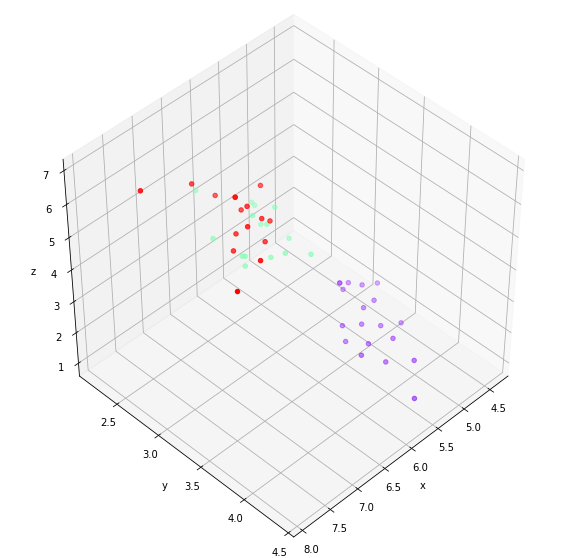

In [45]:
plt.figure(figsize=(10,10))
plot_3D(x_test[::,0],x_test[::,1],x_test[::,2],y_test)